# **<span style="color: #0098cd;">Algoritmos de búsqueda para planificación de rutas en paquetería</span>**

## **Objetivos**

Se busca implementar y analizar distintos algoritmos de búsqueda aplicados a un problema de navegación en un entorno estructurado. Se busca:

- Comparar el rendimiento de algoritmos de búsqueda no informada (Búsqueda en Amplitud - BFS, Búsqueda en Profundidad - DFS).
- Evaluar el comportamiento de algoritmos de búsqueda informada como Costo Uniforme (UCS) y A* con diferentes heurísticas.
- Medir y analizar métricas como longitud del camino, costo total, nodos visitados e iteraciones.
- Visualizar los resultados mediante representaciones gráficas del entorno y los caminos generados.
- Determinar la eficiencia de cada enfoque en distintos escenarios, considerando restricciones del entorno y heurísticas utilizadas.

## **Descripción**

El problema que se simula es una simplificación del que debe abordar una empresa de paquetería al organizar una serie de recogidas en distintos puntos de la ciudad. Para ello sus furgonetas automáticas tienen que ser capaces de encontrar caminos entre su ubicación y los puntos de recogida, y conocer el mapa de la ciudad.  

El proyecto consiste en utilizar varias estrategias de búsqueda con el fin de generar estos caminos de forma automática. 

Se simplifica el problema considerando el espacio dividido en una matriz rectangular, de modo que una furgoneta estará situada en una ubicación identificada por sus coordenadas. La furgoneta puede moverse en sentido horizontal y vertical. Las localizaciones se indican mediante filas y columnas. 

<p align="center">
    <img src="images/desc.png" alt="Clustering K-Means" width="400">
</p>
Posible situación de inicio del problema. El camión representa la posición inicial del agente y la bandera un lugar al que debe ir a recoger un paquete.

El mapa se representa mediante casillas ordenadas en una matriz e incluye paredes que no se pueden traspasar. Se define mediante una sintaxis muy sencilla donde cada símbolo representa un agente, un objetivo, una pared o bien espacio vacío.  

1. El estado inicial consiste en la posición inicial del agente y de las casillas donde hay paquete para recoger. El objetivo es recoger todos los paquetes. 

2. Las acciones permitidas son los movimientos de una casilla en dirección horizontal o vertical (no diagonal). 

3. El coste del movimiento de la furgoneta se configura mediante una variable y varía en los diversos casos de la actividad (ver código). 

4. El código proporcionado incorpora como heurística (para los algoritmos informados) una basada en la distancia de Manhattan. 


Se utilizan diferentes algoritmos:
- Búsqueda en amplitud (BFS): Explora todos los nodos a un mismo nivel antes de profundizar.
- Búsqueda en profundidad (DFS): Explora caminos completos antes de retroceder.
- Coste uniforme (UCS - Dijkstra): Encuentra el camino de menor coste acumulativo.
- A*: Utiliza heurísticas para guiar la búsqueda y reducir el número de nodos explorados.

Las heurísticas implementadas incluyen:
- Distancia de Manhattan (suma de diferencias en coordenadas).
- Distancia de Chebyshev (máxima diferencia en coordenadas).
- Variaciones escaladas de Manhattan para influir en la exploración.

## **Generador del mapa**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap 

def draw_map(game_map):
    """
    Dibuja un mapa de un juego utilizando una codificación de colores específica.

    Parameters:
    game_map (list of list of str): Matriz donde cada elemento es un carácter que representa un tipo de terreno
        en el juego. Los caracteres deben ser uno de los siguientes:
        '#' para muro, ' ' para espacio libre, 'T' para el punto de inicio, 'P' para el objetivo, '·' para camino.

    Returns:
    None: Esta función no devuelve ningún valor, pero muestra un mapa visual del juego utilizando matplotlib.

    Description:
    La función toma una matriz de caracteres y la convierte en un mapa numérico basado en un mapeo predefinido.
    Luego, utiliza matplotlib para dibujar este mapa con una paleta de colores personalizada y muestra una barra
    de color que indica la leyenda del mapa. El mapa es útil para visualizar diferentes secciones del juego, como
    muros, caminos y objetivos.
    """
    # Mapeo de caracteres a valores numericos
    color_map = {'#': 0, ' ': 1, 'T': 2, 'P': 3, '·': 4}
    
    # Creo un colormap personalizado a partir de una lista de colores
    colors = ['black', 'white', 'red', 'blue', 'green']
    cmap = ListedColormap(colors)
    
    # Convertir el mapa de caracteres a un mapa numérico usando el mapeo de colores
    numeric_map = np.array([[color_map[char] for char in row] for row in game_map])
    
    # Creo y muestro el gráfico
    plt.imshow(numeric_map, cmap=cmap)
    cbar = plt.colorbar(ticks=range(len(color_map)))
    cbar.ax.set_yticklabels(['Muro', 'Libre', 'Inicio', 'Objetivo', 'Camino'])
    plt.show()

In [8]:
#!pip install simpleai  # Instala la librería simpleai si no la tienes instalada
from __future__ import print_function
from simpleai.search.viewers import BaseViewer
from simpleai.search import SearchProblem, astar, breadth_first, depth_first, uniform_cost
# Búsqueda en amplitud (breadth-first search) y búsqueda en profundidad (depth-first search).
# astar es otro algoritmo de búsqueda, más conocido como A* (A estrella)

class GameWalkPuzzle(SearchProblem):

    def __init__(self, board, costs, heuristic_number):
        self.board = board
        self.goal = (0, 0)
        self.costs = costs
        self.heuristic_number = heuristic_number
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "t":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "p":
                    self.goal = (x, y)

        super(GameWalkPuzzle, self).__init__(initial_state=self.initial)

    def actions(self, state):
        actions = []
        for action in list(self.costs.keys()):
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state

    def is_goal(self, state):
        return state == self.goal

    def cost(self, state, action, state2):
        return self.costs[action]

    # Esta función heurística es la distancia entre el estado actual
    # el objetivo (único) identificado como self.goal
    def heuristic1(self, state):
        x, y = state
        gx, gy = self.goal
        return abs(x - gx) + abs(y - gy) # distancia de Manhattan

    def heuristic2(self, state):
        x, y = state
        gx, gy = self.goal
        return max(abs(x - gx),abs(y - gy)) # distancia de Chebychev

    def heuristic3(self, state):
        x, y = state
        gx, gy = self.goal
        return 2*(abs(x - gx) + abs(y - gy)) # distancia de Manhattan modificada
    
    def heuristic4(self, state):
        x, y = state
        gx, gy = self.goal
        return 4*(abs(x - gx) + abs(y - gy)) # distancia de Manhattan modificada

    def heuristic(self,state):
      if self.heuristic_number == 1:
          return self.heuristic1(state)
      elif self.heuristic_number == 2:
          return self.heuristic2(state)
      elif self.heuristic_number == 3:
          return self.heuristic3(state)
      elif self.heuristic_number == 4:
          return self.heuristic4(state)
      else:
        raise Exception("El número de la función heurística debe estar entre 1 y 4")

def searchInfo (problem,result,use_viewer):
    def getTotalCost (problem,result):
        originState = problem.initial_state
        totalCost = 0
        for action,endingState in result.path():
            if action is not None:
                totalCost += problem.cost(originState,action,endingState)
                originState = endingState
        return totalCost


    res = "Total length of solution: {0}\n".format(len(result.path()))
    res += "Total cost of solution: {0}\n".format(getTotalCost(problem,result))

    if use_viewer:
        stats = [{'name': stat.replace('_', ' '), 'value': value}
                         for stat, value in list(use_viewer.stats.items())]

        for s in stats:
            res+= '{0}: {1}\n'.format(s['name'],s['value'])
    return res



# Configuramos aqui la funcion resultado_experimento para graficar con nuestra funcion
def resultado_experimento(problem, MAP, result, used_viewer):
    path = [x[1] for x in result.path()]
    visual_map = [list(row) for row in MAP]  # Creo una copia del mapa para modificar

    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                visual_map[y][x] = 'T'  # Marca la posición inicial
            elif (x, y) == problem.goal:
                visual_map[y][x] = 'P'  # Marca la posición objetivo
            elif (x, y) in path:
                visual_map[y][x] = '·'  # Marca el camino recorrido

    draw_map(visual_map)  # Dibuja el mapa con Matplotlib

    info = searchInfo(problem, result, used_viewer)
    print(info)

def main(MAP_ASCII,COSTS,algorithms,heuristic_number=1):
    MAP = [list(x) for x in MAP_ASCII.split("\n") if x]
    
    for algorithm in algorithms:
      problem = GameWalkPuzzle(MAP,COSTS,heuristic_number)
      used_viewer=BaseViewer()
      # Mostramos los experimentos
      print ("Experimento con algoritmo {}:".format(algorithm))

      result = algorithm(problem, graph_search=True, viewer=used_viewer)
      resultado_experimento(problem,MAP,result,used_viewer)

## **Caso 1 - Búsqueda en Amplitud y Búsqueda en Profundidad**

Experimento con algoritmo <function breadth_first at 0x0000017A86DBF1A0>:


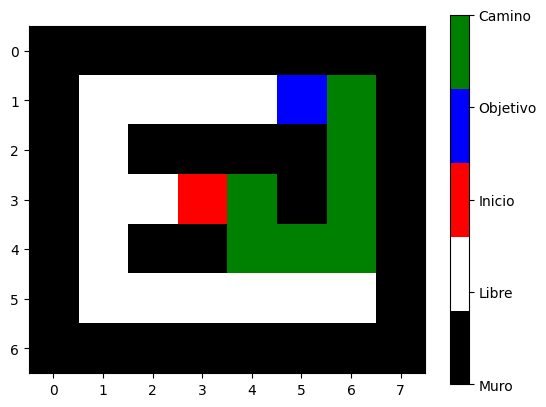

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function depth_first at 0x0000017A86E00680>:


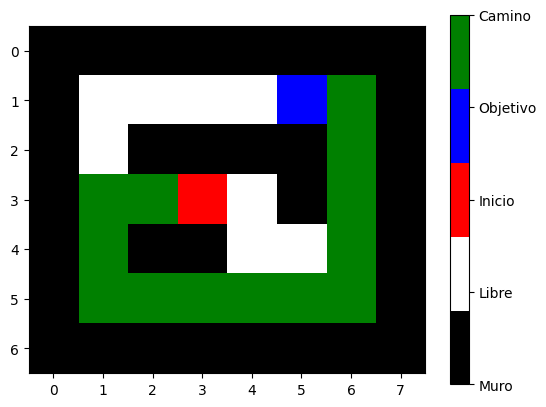

Total length of solution: 15
Total cost of solution: 14.0
max fringe size: 5
visited nodes: 15
iterations: 15



In [9]:
# Se ejecutan los algoritmos de búsqueda en amplitud (Breadth-First Search) y búsqueda en profundidad (Depth-First Search).

# Mapa del juego
MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

# Costes de moverse en cada dirección
COSTS = { 
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(breadth_first,depth_first) # Algoritmos de búsqueda en amplitud y búsqueda en profundidad
main (MAP_ASCII,COSTS,algorithms)      # Se ejecuta la función main

Recopilando los resultados obtenidos tenemos que:

| Algoritmo       | Longitud de la solución | Costo total | Tamaño máximo de la frontera | Nodos visitados | Iteraciones |
|----------------|------------------------|-------------|------------------------------|-----------------|-------------|
| BFS (Amplitud) | 9                      | 8         | 5                            | 23              | 23          |
| DFS (Profundidad) | 15                  | 14        | 5                            | 15              | 15          |


### **¿Obtiene el algoritmo de amplitud un resultado óptimo?**

Sí, el algoritmo en amplitud siempre encuentra un resultado óptimo, ya que expande todos los nodos de cada nivel antes de pasar al siguiente. El problema es que la solución es compleja, vemos que ha necesitado 23 iteraciones para llegar a la solución.

### **¿Obtiene el algoritmo de profundidad un resultado óptimo?**

No, el algoritmo de búsqueda por profundidad va explorando los nodos del grafo sin detenerse hasta que, o bien no pueda continuar, o bien solo pueda ir a un nodo ya visitado. Una vez encuentra una solución, óptima o no, el algoritmo para de buscar.

Por eso este es menos costoso computacionalmente, y por eso también la solución solo será óptima por mero azar


### **¿Qué algoritmo es más eficiente en este caso particular?**

Entendiendo el concepto de eficiencia como la toma de los mínimos recursos posibles para resolver un problema llegando a una respuesta correcta, entonces el algoritmo en profundidad sería más eficiente porque ha expandido menos nodos para encontrar una solución.

## **Caso 2 - Búsqueda en Amplitud, Dijkstra y A*** **con variaciones de costes**

Para este caso se probarán y compararán los algoritmos de búsqueda amplitud, Dijkstra y A*. 

Experimento con algoritmo <function breadth_first at 0x0000017A86DBF1A0>:


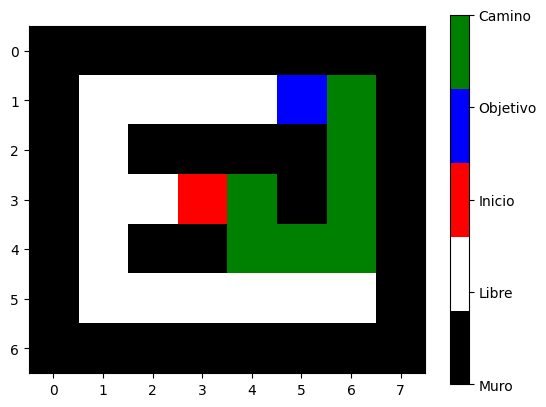

Total length of solution: 9
Total cost of solution: 28.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function uniform_cost at 0x0000017A86E01440>:


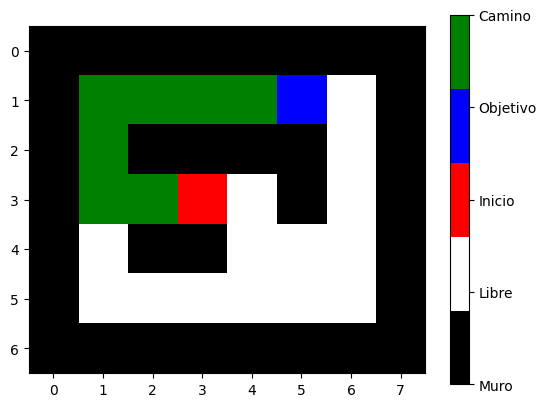

Total length of solution: 9
Total cost of solution: 22.0
max fringe size: 6
visited nodes: 22
iterations: 22

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


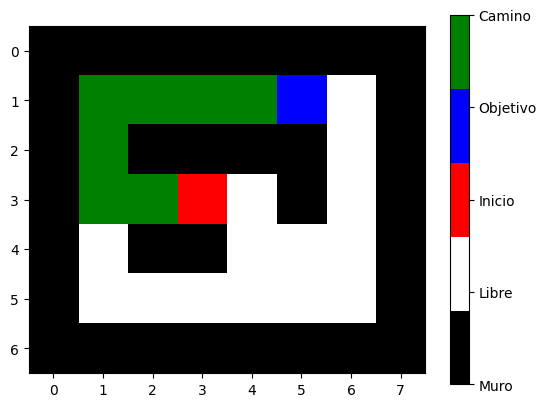

Total length of solution: 9
Total cost of solution: 22.0
max fringe size: 6
visited nodes: 20
iterations: 20



In [10]:
# Se utiliza el mismo mapa pero se varían los costes y los algoritmos elegidos

MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

# Costes de moverse en cada dirección
COSTS = {
    "up": 5.0,
    "down": 5.0,
    "right": 2.0,
    "left": 2.0,
}

algorithms=(breadth_first,uniform_cost,astar) # Algoritmos de búsqueda en amplitud, coste uniforme y A*
main (MAP_ASCII,COSTS,algorithms)

Recopilando los resultados obtenidos tenemos que:

| Algoritmo        | Longitud de la solución | Costo total | Tamaño máximo de la frontera | Nodos visitados | Iteraciones |
|-----------------|------------------------|-------------|------------------------------|-----------------|-------------|
| BFS (Amplitud)  | 9                      | 28          | 5                            | 23              | 23          |
| UCS (Dijkstra)  | 9                      | 22          | 6                            | 22              | 22          |
| A* (Heurística) | 9                      | 22         | 6                            | 20              | 20          |

### **¿Obtiene UCS  (Dijkstra) el camino de coste óptimo?**

Sí, el algoritmo UCS-Dijkstra obtiene el camino con coste óptimo que para este problema es 22 puesto que en cada iteración UCS expande primero el nodo de menor coste hasta llegar al objetivo, explorando todos los posibles caminos. 

Por ejemplo, en este ejercicio el coste de ejecutar los movimientos arriba y abajo es superior al de los movimientos izquierda y derecha. Se observa que en el recorrido obtenido con Dijkstra se maximiza el número de movimientos horizontales frente a los verticales. Así, aunque emplea el mismo número de movimientos que el algoritmo de búsqueda en amplitud (que sabemos es óptimo en cuanto a número de nodos expandidos), el coste es menor.

### **¿Obtiene A*** **el camino de coste óptimo?**

Sí, A* obtiene el camino de coste óptimo, y además es capaz de encontrar dicho camino con menos iteraciones. 

Esto sucede porque este algoritmo está introduciendo la función heurística, proporcionando información al algoritmo y por tanto puede basar la elección del nodo a expandir tratando de minimizar el coste y número de operaciones.

### **¿Los resultados de UCS y A*** **siempre serán de este modo aunque se varíe el mapa?**

Tanto el algoritmo de UCS como el algoritmo A* encontrarán la solución con coste óptimo, independientemente de si cambia el mapa o no.

Por definición, ambos algoritmos eligen expandir primero el nodo de menor coste g(n) (UCS) o el nodo que minimiza la función de evaluación (g(n) + h(n)) para A*, siempre que la heurística (h(n)) para A* sea admisible.

### **¿Los resultados de UCS y A*** **siempre serán de este modo aunque se varíen los costes?**

No puedo afirmar eso. El algoritmo UCS no tendría ningún problema y sí que nos daría la solución con coste óptimo, sin embargo en el caso del algoritmo A* tendríamos que revisar que su heurística siguiera siendo válida para estos nuevos costes.

### **¿Cuál de los dos algoritmos (UCS o A***) **es más eficiente en este caso?**

En este caso el algoritmo A* es más eficiente, puesto que expande 20 nodos, frente a los 22 que expande UCS. Siempre que tengamos una heurística admisible para nuestro problema, es decir que subestima o iguala el costo real mínimo, A* va a ser, como poco, igual de eficiente que UCS. Puesto que cuenta con información sobre la estimación del coste total, este algoritmo puede tomar mejores decisiones a la hora de expandir nodos y por tanto, aun llegando al mismo resultado los dos algoritmos, A* lo hará con menos movimientos.

## **Caso 3 - A*** **con diferentes heurísticas**

Experimento con algoritmo <function uniform_cost at 0x0000017A86E01440>:


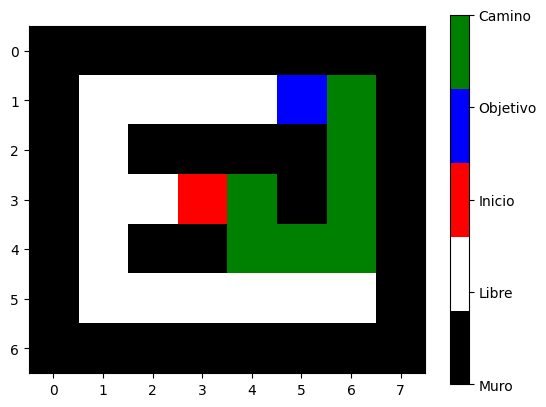

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


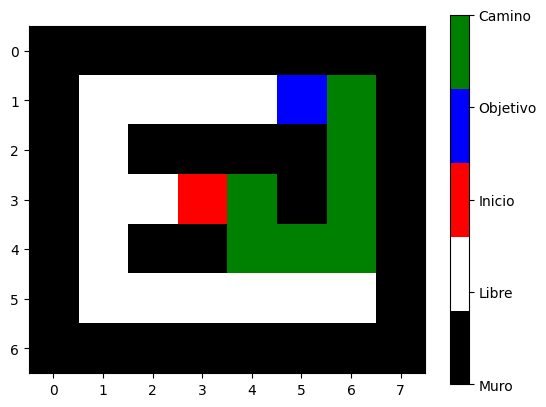

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 16
iterations: 16

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


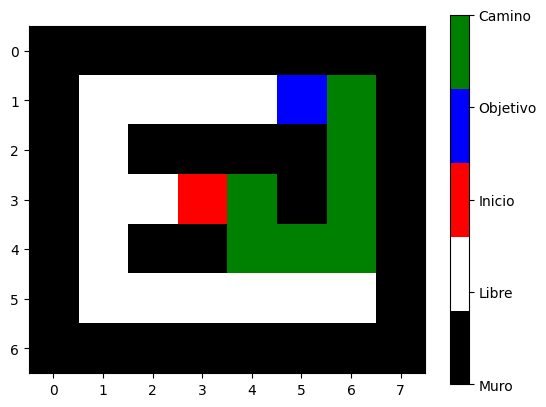

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 6
visited nodes: 17
iterations: 17

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


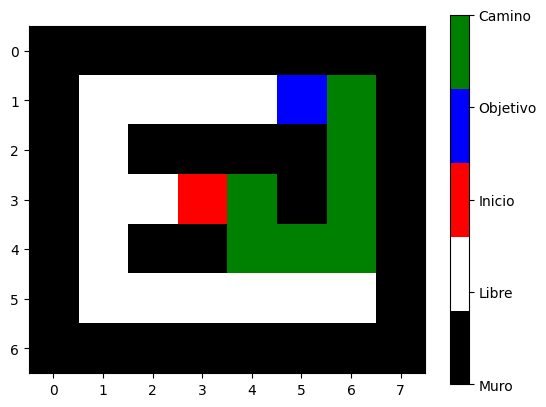

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 4
visited nodes: 11
iterations: 11



In [11]:
# Se utiliza el mismo mapa y se usan diferentes heurísticas

MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

# Costes de moverse en cada dirección
COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(astar,)

main (MAP_ASCII,COSTS,(uniform_cost, astar,),1)
main (MAP_ASCII,COSTS,algorithms,2)
main (MAP_ASCII,COSTS,algorithms,3)

Recopilando los resultados obtenidos tenemos que:

| Algoritmo        | Heurística           | Longitud de la solución | Costo total | Tamaño máximo de la frontera | Nodos visitados | Iteraciones |
|-----------------|----------------------|------------------------|-------------|------------------------------|-----------------|-------------|
| UCS (Dijkstra)  | N/A                  | 9                      | 8           | 5                            | 23              | 23          |
| A*              | Manhattan            | 9                      | 8           | 5                            | 16              | 16          |
| A*              | Chebyshev            | 9                      | 8           | 6                            | 17              | 17          |
| A*              | Manhattan (x2)       | 9                      | 8           | 6                            | 17              | 17          |
| A*              | Manhattan (x4)       | 9                      | 8           | 4                            | 11              | 11          |

### **¿Obtiene UCS  (Dijkstra) el camino de coste óptimo?**

Sí. Como ya se dijo anteriormente, UCS (Dijkstra) obtiene el camino de coste óptimo, aunque en este caso resulta ser la opción menos eficiente.

### **¿Obtiene A*** **el camino de coste óptimo con todas las heurísticas?**

Sí, obtenemos el mismo camino que obtuvimos con UCS, que es el camino óptimo, aunque dependiendo de cuál se use se obtendrá un resultado más eficiente o menos. 

Aún así, sabemos que la heurística 3 sobreestima el coste, de manera que no es una heurística admisible, por lo que, en general, no podríamos asegurar que el camino que encuentre sea el óptimo, podría ser un camino subóptimo.

### **¿Se puede afirmar que los resultados no varían al cambiar el mapa para ninguna de las heurísticas presentadas?**

No, solo podríamos afirmarlo para las heurísticas 1 y 2, que son admisibles y por tanto encontrarán el camino óptimo. En el caso de la heurística 3 (no admisible), no podemos afirmar matemáticamente que el camino encontrado sea el óptimo.

### **Si la respuesta anterior es no en algún caso, prueba esta afirmación diseñando un mapa que compruebe este hecho.**

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


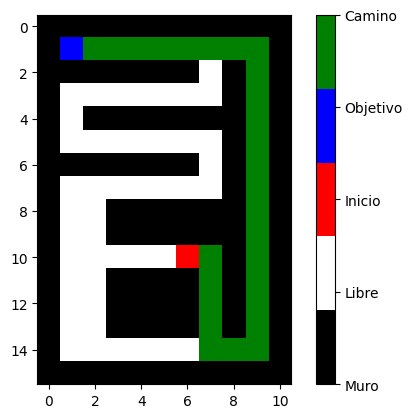

Total length of solution: 29
Total cost of solution: 28.0
max fringe size: 7
visited nodes: 70
iterations: 70

Experimento con algoritmo <function astar at 0x0000017A86E01580>:


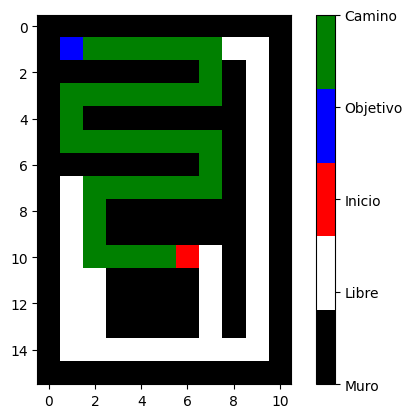

Total length of solution: 37
Total cost of solution: 36.0
max fringe size: 7
visited nodes: 58
iterations: 58



In [12]:
MAP_ASCII = """
###########
#P        #
####### # #
#       # #
# ####### #
#       # #
####### # #
#       # #
#  ###### #
#  ###### #
#     T # #
#  #### # #
#  #### # #
#  #### # #
#         #
###########
"""

# Costes de moverse en cada dirección
COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(astar,)
main (MAP_ASCII,COSTS,algorithms,2)
main (MAP_ASCII,COSTS,algorithms,3)

Recopilando los resultados obtenidos tenemos que:

| Algoritmo        | Heurística           | Longitud de la solución | Costo total | Tamaño máximo de la frontera | Nodos visitados | Iteraciones |
|-----------------|----------------------|------------------------|-------------|------------------------------|-----------------|-------------|
| A*              | Chebyshev            | 29                     | 28.0        | 7                            | 70              | 70          |
| A*              | Manhattan (x2)       | 37                     | 36.0        | 7                            | 58              | 58          |

El primer algoritmo utiliza la heurística 2 (subestima el coste, admisible) y el segundo, la heurística 3 (sobreestima, no es admisible). Con la heurística 2 encontramos el camino óptimo, sin embargo, la heurística 3, que sobreestima el coste, encuentra otro camino alternativo al óptimo ya que descarta “alejarse” (tomar el camino descendente) de su objetivo al tener la heurística inflada.

#### **¿Es el algoritmo A*** **igualmente eficiente en todos los casos?**

La eficiencia de A*, al ser un algoritmo informado, depende de la heurística que se considere. Cuanto más nos acerquemos, sin pasarnos por lo antes expuesto, a la función de costo en cada paso, más fielmente aumentará la eficiencia del algoritmo. Por sintetizar, la eficiencia del algoritmo A* está intrínsecamente ligada a la calidad y adecuación de la heurística empleada.